In [3]:
import os

def count_files(directory):
    total_files = 0
    for root, dirs, files in os.walk(directory):
        total_files += len(files)
    return total_files

directory_path = "/home/olisvalue/contests/baseline/data/test"  # Замените на путь к вашей директории
total_files = count_files(directory_path)
print(f"Total number of files: {total_files}")


Total number of files: 55170


In [13]:
!nvidia-smi

Wed Oct 30 00:41:58 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 561.09         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 ...    On  |   00000000:01:00.0  On |                  N/A |
| N/A   63C    P0             69W /   91W |    7457MiB /   8188MiB |     32%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [21]:
model

Resnet50(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (batch_norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (max_pool1): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
      (ibn): IBN(
        (IN): InstanceNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
        (BN): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (batch_norm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
      (batch_norm3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (downsample): 

In [ ]:
def dataloader_factory(config: Dict, data_split: str) -> List[DataLoader]:
    return cover_dataloader(
        data_path=config["data_path"],
        file_ext=config["file_extension"],
        #dataset_path=config[data_split]["dataset_path"],
        data_split=data_split,
        debug=config["debug"],
        max_len=50,
        **config[data_split]
    )

In [1]:
from models.data_loader import *
from models.train_module import TrainModule
from utils import initialize_logging, load_config

config = load_config(config_path="./config/config.yaml")

data = CoverDataset(
    data_path=config["data_path"],
    file_ext=config["file_extension"],
    data_split='train',
    debug=config["debug"],
    max_len=50,
    dataset_path="/home/olisvalue/contests/baseline/data/train")

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: olisov-val (olisov-valery). Use `wandb login --relogin` to force relogin


In [14]:
data[10]

{'anchor_id': 101132,
 'anchor': tensor([[-37.9339, -47.1424, -49.4307,  ..., -44.5003, -49.0376, -47.8732],
         [-47.9217, -53.6549, -46.8915,  ..., -37.0682, -36.7066, -42.4840],
         [-45.6500, -49.3287, -41.4307,  ..., -43.8769, -48.4424, -51.6526],
         ...,
         [-18.9581, -14.5404, -35.9395,  ..., -22.2162, -19.9760, -20.1530],
         [-24.0785, -16.2114, -39.0282,  ..., -20.2224, -22.9925, -21.0042],
         [-20.1926, -19.5957, -37.4740,  ..., -24.9932, -21.5131, -25.3881]]),
 'anchor_label': tensor(37500.),
 'positive_id': 361210,
 'positive': tensor([[-46.8528, -40.8082, -38.3089,  ..., -42.0867, -46.8047, -36.5659],
         [-45.1645, -41.7933, -49.0641,  ..., -40.7385, -43.3461, -47.7235],
         [-53.7401, -45.1176, -35.0870,  ..., -39.7731, -44.8656, -39.5101],
         ...,
         [-19.0609, -16.2525, -25.1548,  ..., -13.7560, -25.4932, -23.5486],
         [-23.9057, -20.4285, -25.5352,  ..., -21.0654, -27.7281, -18.6133],
         [-22.7502, -2

In [3]:
class zero:
    def item(self):
        return 0

AttributeError: 'set' object has no attribute 'item'

In [ ]:
import os
import torch

def save_data_dynamically(data, root_dir='train'):
    """
    Сохраняет данные динамически, организуя их по структуре anchor_label/anchor_id.pt.
    
    Параметры:
    - data: исходный датасет, состоящий из элементов с полями 'anchor_id', 'anchor', 'anchor_label', 'positive', 'negative'.
    - root_dir: корневая директория для сохранения данных.
    """
    # Создание корневой директории
    os.makedirs(root_dir, exist_ok=True)
    
    for item in data:
        # Извлекаем anchor_label и anchor_id
        anchor_label = int(item['anchor_label'].item())
        anchor_id = item['anchor_id']
        
        # Создаем директорию для текущей метки, если она еще не существует
        label_dir = os.path.join(root_dir, str(anchor_label))
        os.makedirs(label_dir, exist_ok=True)
        
        # Формируем путь к файлу для anchor и сохраняем его
        anchor_file_path = os.path.join(label_dir, f"{anchor_id}.pt")
        torch.save(item['anchor'], anchor_file_path)
        
        # Можно добавить аналогичное сохранение для positive и negative, если требуется
        positive_id = item.get('positive_id')
        negative_id = item.get('negative_id')
        
        if positive_id:
            positive_file_path = os.path.join(label_dir, f"{positive_id}_positive.pt")
            torch.save(item['positive'], positive_file_path)
        
        if negative_id:
            negative_file_path = os.path.join(label_dir, f"{negative_id}_negative.pt")
            torch.save(item['negative'], negative_file_path)

# Пример вызова функции
# save_data_dynamically(data)


In [2]:
from collections import defaultdict

# Инициализируем словарь для подсчета треков в каждой клике
clique_counts = defaultdict(int)

# Проходим по каждому объекту в `CoverDataset` и считаем клики
for item in data:
    clique_id = int(item['anchor_label'].item())
    clique_counts[clique_id] += 1

# Подсчитываем общее количество уникальных клик
total_cliques = len(clique_counts)

# Находим минимальный, максимальный размер клики и дисперсию
clique_sizes = list(clique_counts.values())
min_clique_size = min(clique_sizes)
max_clique_size = max(clique_sizes)
std_dev_clique_size = np.std(clique_sizes)

print(f"Всего клик: {total_cliques}")
print(f"Минимальный размер клики: {min_clique_size}")
print(f"Максимальный размер клики: {max_clique_size}")
print(f"Среднеквадратичное отклонение размеров клик: {std_dev_clique_size}")


Всего клик: 39535
Минимальный размер клики: 2
Максимальный размер клики: 1360
Среднеквадратичное отклонение размеров клик: 20.183131703633308


In [5]:
np.mean(clique_sizes)

7.564284810927027

In [6]:
import random

# Выбираем случайный clique_id
random_clique_id = random.choice(list(clique_counts.keys()))

# Собираем все треки из выбранной клики
sample_from_clique = [item for item in data if int(item['anchor_label'].item()) == random_clique_id]

# Выбираем 10 объектов для анализа
sample_from_clique = random.sample(sample_from_clique, min(10, len(sample_from_clique)))

print(f"Случайно выбранная клика ID: {random_clique_id}")
print("Треки из этой клики (ID объектов):", [obj['anchor_id'] for obj in sample_from_clique])


Случайно выбранная клика ID: 37444
Треки из этой клики (ID объектов): [88262, 162231, 240575, 133906]


In [8]:
0.9975**20

0.9511698752531668

In [8]:
# Выбираем 10 объектов для анализа
sample_from_clique = random.sample(sample_from_clique, min(10, len(sample_from_clique)))

print(f"Случайно выбранная клика ID: {random_clique_id}")
print("Треки из этой клики (ID объектов):", [obj['anchor_id'] for obj in sample_from_clique])

Случайно выбранная клика ID: 37444
Треки из этой клики (ID объектов): [88262, 133906, 240575, 162231]


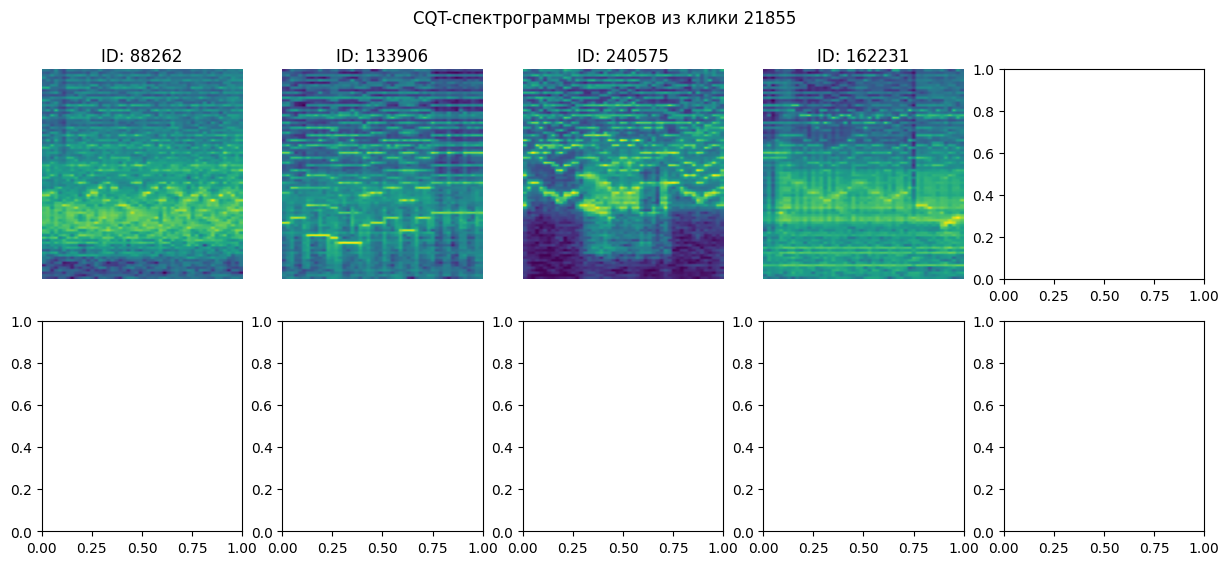

In [10]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(15, 6))

for i, item in enumerate(sample_from_clique[:10]):
    cqt_spectrogram = item['anchor'].numpy()  # Получаем данные спектрограммы
    
    ax = axs[i // 5, i % 5]
    ax.imshow(cqt_spectrogram, aspect='auto', origin='lower')
    ax.set_title(f"ID: {item['anchor_id']}")
    ax.axis('off')

plt.suptitle(f"CQT-спектрограммы треков из клики {random_clique_id}")
plt.show()


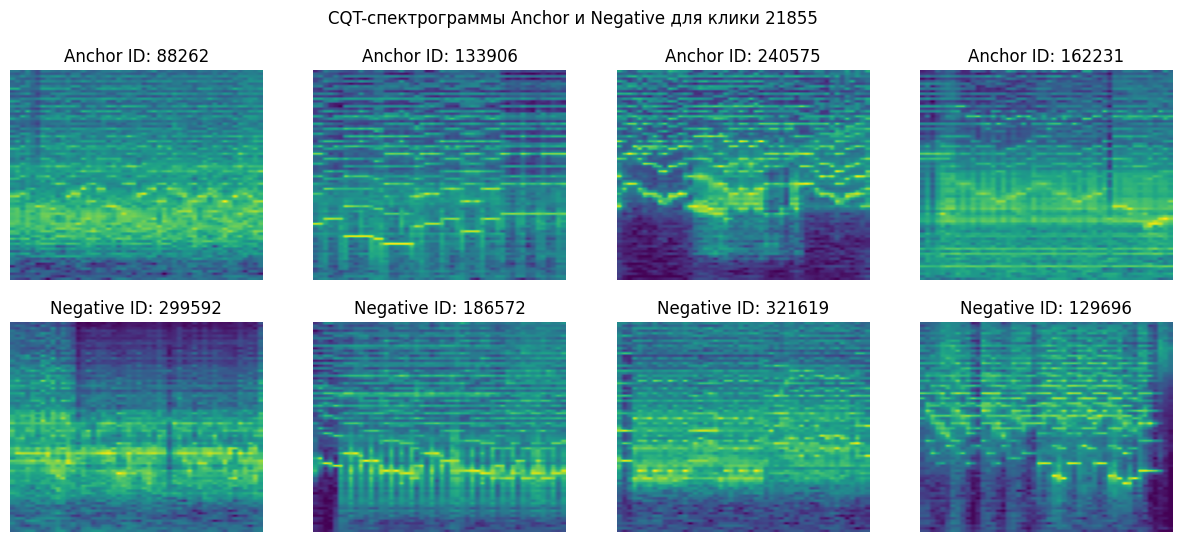

In [14]:
import random
import matplotlib.pyplot as plt

# Выбираем случайный clique_id из данных
# random_clique_id = random.choice(list(clique_counts.keys()))

# # Извлекаем все треки (анкор и их негативы) из выбранной клики
# tracks_in_clique = [item for item in data if int(item['anchor_label'].item()) == random_clique_id]

# Выбираем 5 треков для визуализации (или все, если в клике меньше 5 треков)
# sample_tracks = random.sample(tracks_in_clique, min(5, len(tracks_in_clique)))

fig, axs = plt.subplots(2, len(sample_from_clique), figsize=(15, 6))

for i, item in enumerate(sample_from_clique):
    # Извлекаем CQT-спектрограммы для anchor и negative
    anchor_spectrogram = item['anchor'].numpy()
    negative_spectrogram = item['negative'].numpy()
    
    # Отображаем спектрограмму anchor
    ax_anchor = axs[0, i]
    ax_anchor.imshow(anchor_spectrogram, aspect='auto', origin='lower')
    ax_anchor.set_title(f"Anchor ID: {item['anchor_id']}")
    ax_anchor.axis('off')

    # Отображаем спектрограмму negative
    ax_negative = axs[1, i]
    ax_negative.imshow(negative_spectrogram, aspect='auto', origin='lower')
    ax_negative.set_title(f"Negative ID: {item['negative_id']}")
    ax_negative.axis('off')

# Добавляем общие заголовки
plt.suptitle(f"CQT-спектрограммы Anchor и Negative для клики {random_clique_id}")
plt.show()

In [1]:
from models.modules import Bottleneck, Resnet50, TransformerEncoderModel
model = Resnet50(
            Bottleneck,
            num_channels=1,
            num_classes=39535,
            dropout=0.1
        )
model.to('cuda:0')


# out = model.forward(data[10]['anchor'].unsqueeze(0).to('cuda:0'))

Resnet50(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (batch_norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (max_pool1): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
      (ibn): IBN(
        (IN): InstanceNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
        (BN): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (batch_norm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
      (batch_norm3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (downsample): 

In [ ]:
model

In [3]:
model.eval()
out = model.forward(data[10]['anchor'].unsqueeze(0).to('cuda:0'))

inside resnet 50. x has shape torch.Size([1, 84, 50])
inside resnet 50. before layer 1, x has shape torch.Size([1, 64, 84, 50])
**************************************************
input has shape torch.Size([1, 64, 84, 50])
after conv1 x has shape torch.Size([1, 64, 84, 50])
after ibn and relu x has shape torch.Size([1, 64, 84, 50])
after conv2 x has shape torch.Size([1, 64, 84, 50])
after conv3 x has shape torch.Size([1, 256, 84, 50])
out has shape torch.Size([1, 256, 84, 50])
**************************************************
**************************************************
input has shape torch.Size([1, 256, 84, 50])
after conv1 x has shape torch.Size([1, 64, 84, 50])
after ibn and relu x has shape torch.Size([1, 64, 84, 50])
after conv2 x has shape torch.Size([1, 64, 84, 50])
after conv3 x has shape torch.Size([1, 256, 84, 50])
out has shape torch.Size([1, 256, 84, 50])
**************************************************
**************************************************
input has 